In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Problem 1

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [4]:
houseData = pd.read_csv("/content/drive/MyDrive/EE0005/LAB4/train.csv")
houseData

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
houseNumData = pd.DataFrame(houseData[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])
houseNumData

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
0,8450,1710,856,548,208500
1,9600,1262,1262,460,181500
2,11250,1786,920,608,223500
3,9550,1717,756,642,140000
4,14260,2198,1145,836,250000
...,...,...,...,...,...
1455,7917,1647,953,460,175000
1456,13175,2073,1542,500,210000
1457,9042,2340,1152,252,266500
1458,9717,1078,1078,240,142125


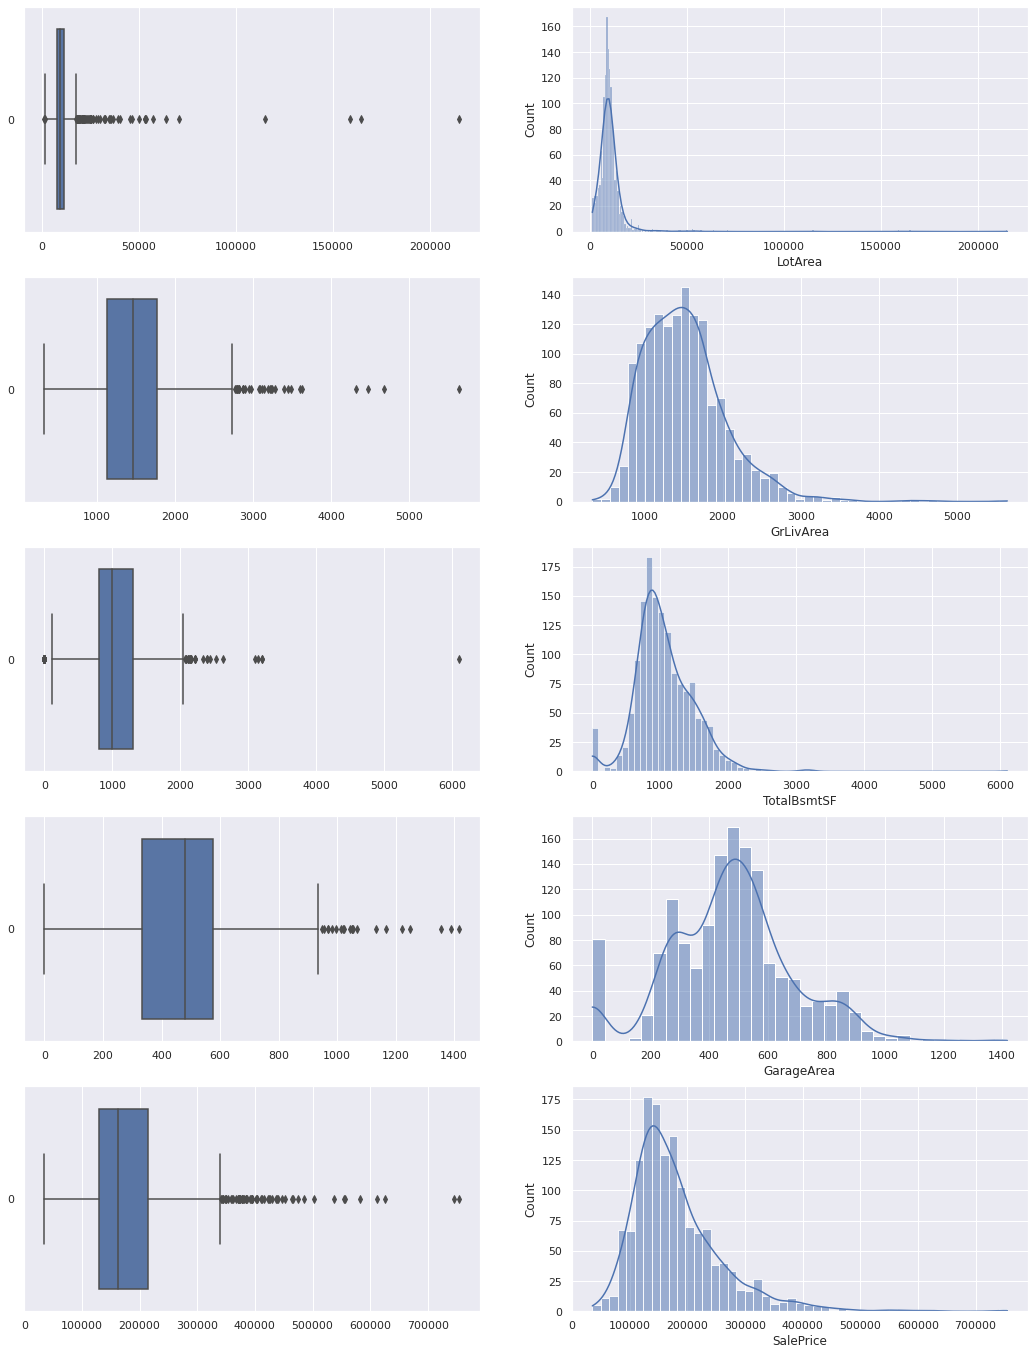

In [6]:
# Draw the distributions of all variables
f, axes = plt.subplots(5, 2, figsize=(18, 24))

count = 0
for var in houseNumData:
    sb.boxplot(data = houseNumData[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = houseNumData[var],kde = True, ax = axes[count,1])
    count += 1

In [7]:
houseNumData.corr()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
LotArea,1.000000,0.263116,0.260833,0.180403,0.263843
GrLivArea,0.263116,1.000000,0.454868,0.468997,0.708624
TotalBsmtSF,0.260833,0.454868,1.000000,0.486665,0.613581
GarageArea,0.180403,0.468997,0.486665,1.000000,0.623431
SalePrice,0.263843,0.708624,0.613581,0.623431,1.000000


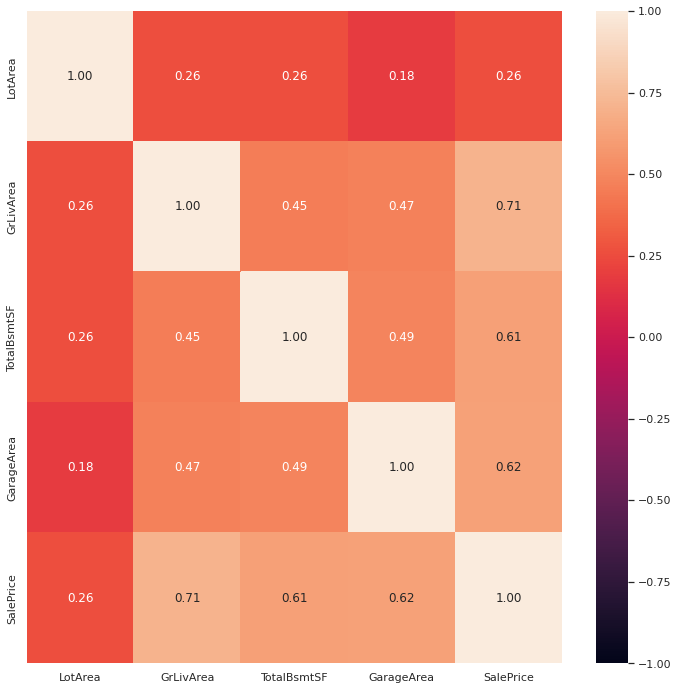

In [8]:
f = plt.figure(figsize=(12, 12))
sb.heatmap(houseNumData.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

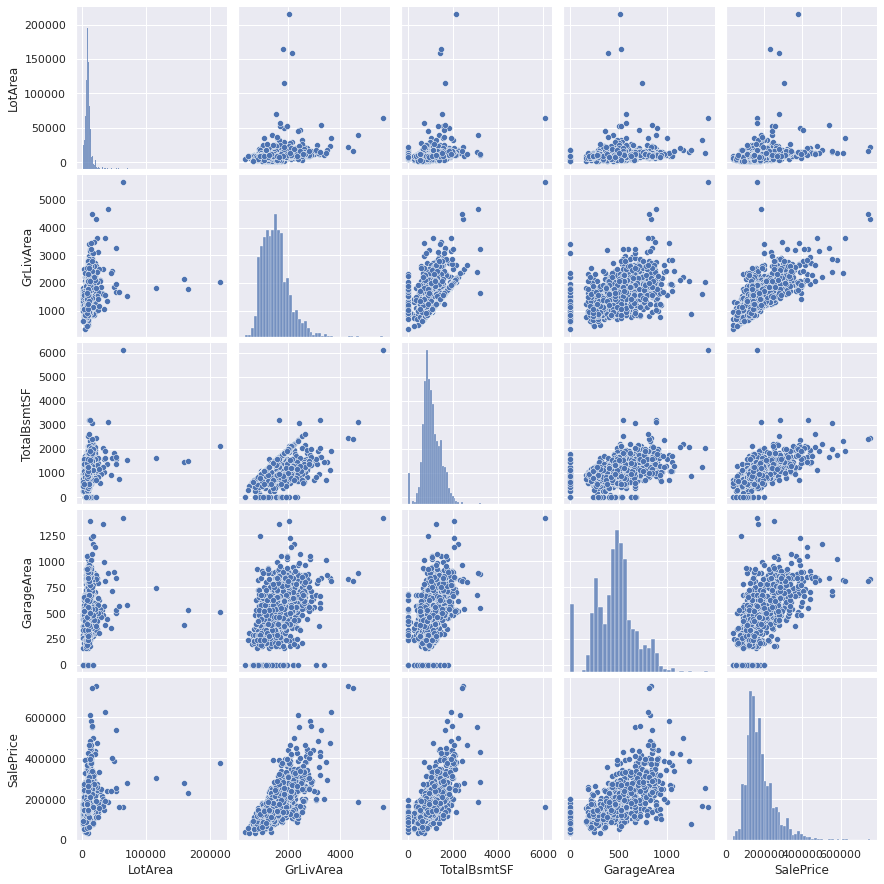

In [9]:
sb.pairplot(data = houseNumData)

# Problem 2 

In [10]:
houseCatData = pd.DataFrame(houseData[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])
houseCatData

,MSSubClass,Neighborhood,BldgType,OverallQual
0,60,CollgCr,1Fam,7
1,20,Veenker,1Fam,6
2,60,CollgCr,1Fam,7
3,70,Crawfor,1Fam,7
4,60,NoRidge,1Fam,8
...,...,...,...,...
1455,60,Gilbert,1Fam,6
1456,20,NWAmes,1Fam,6
1457,70,Crawfor,1Fam,7
1458,20,NAmes,1Fam,5


In [11]:
houseCatData = houseCatData.astype('category')
houseCatData.dtypes

MSSubClass      category
Neighborhood    category
BldgType        category
OverallQual     category
dtype: object

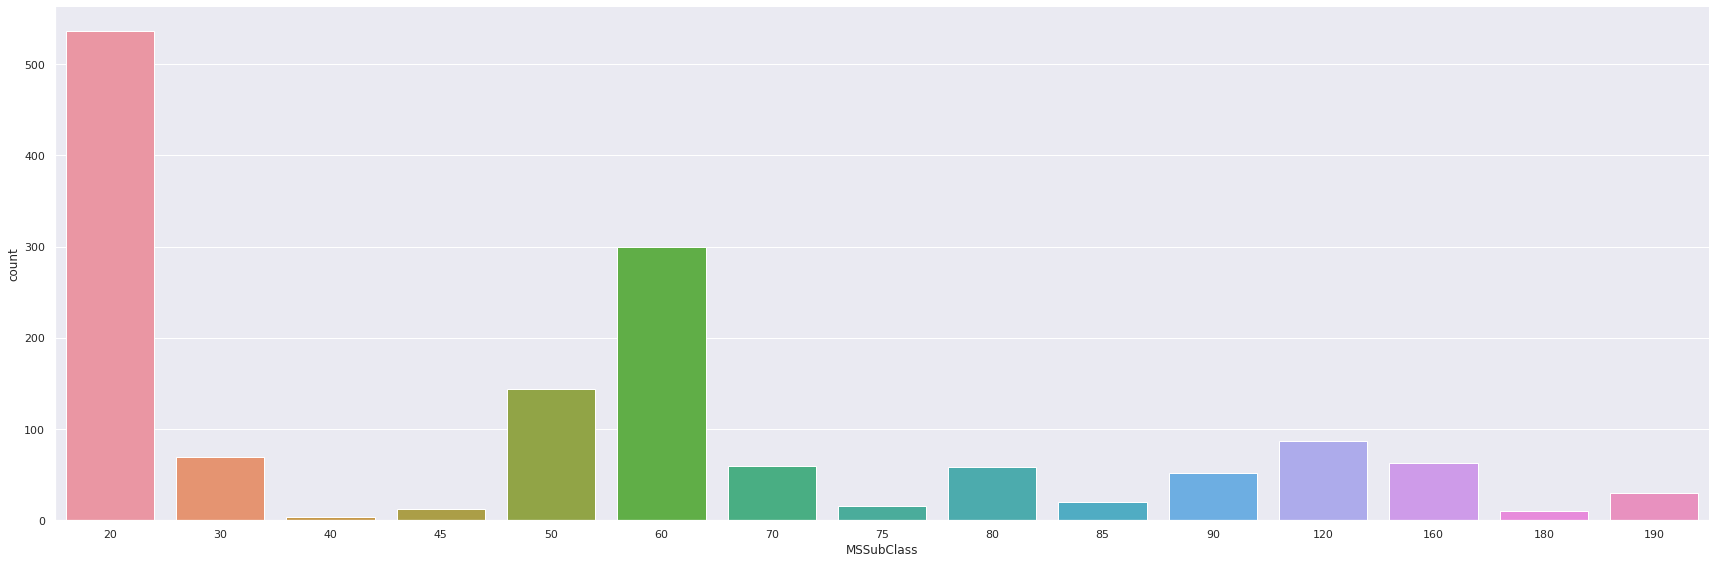

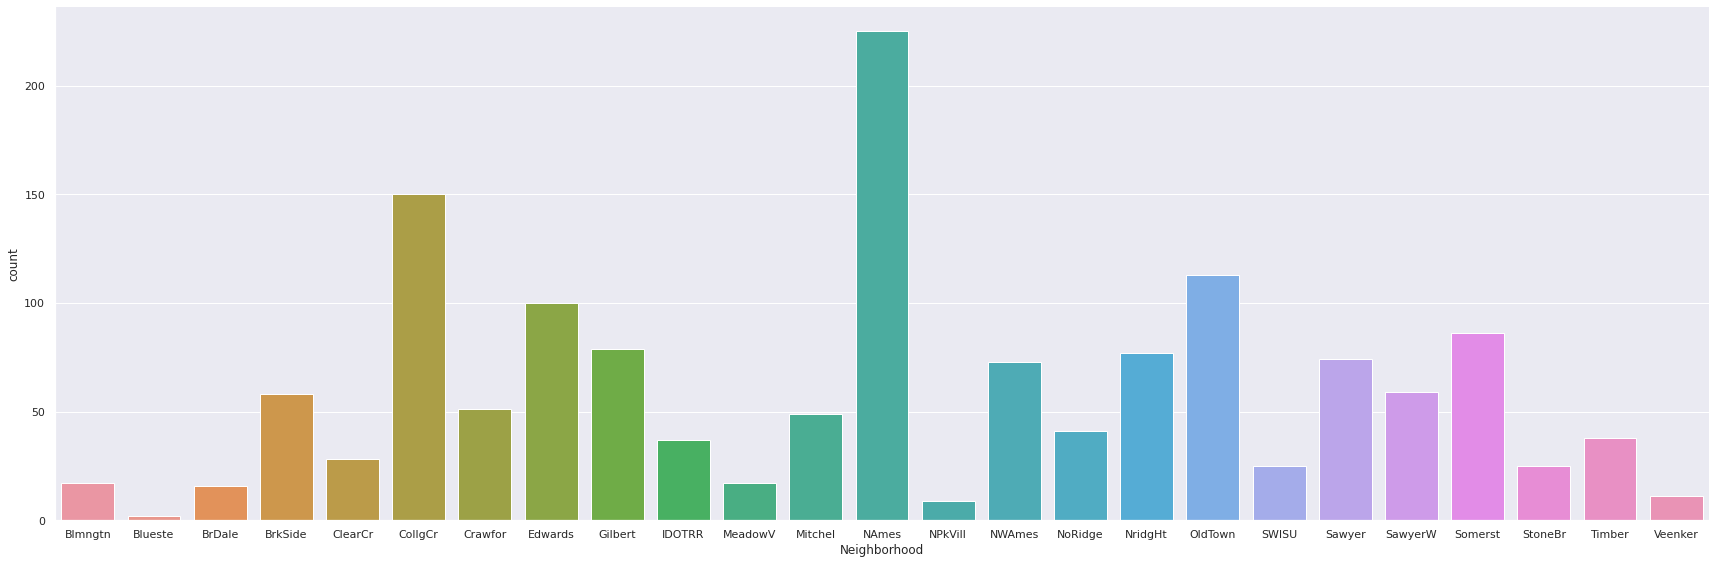

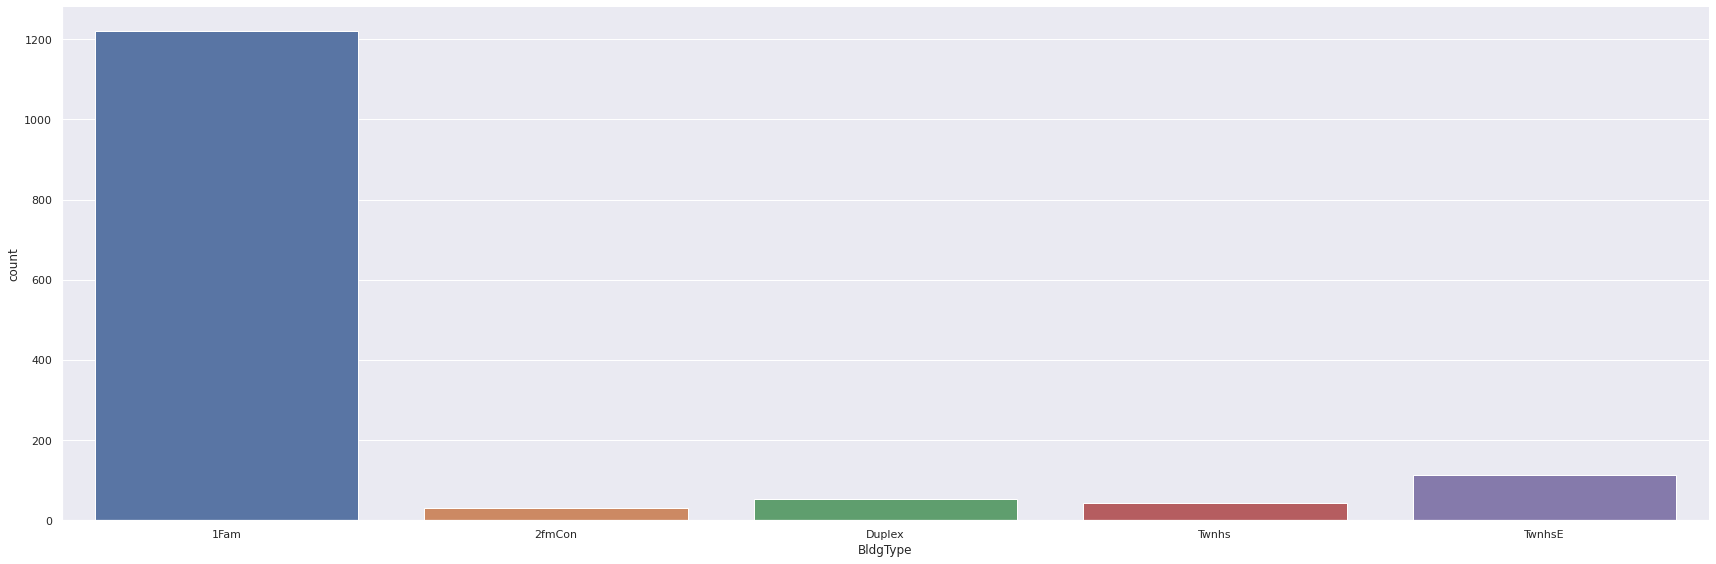

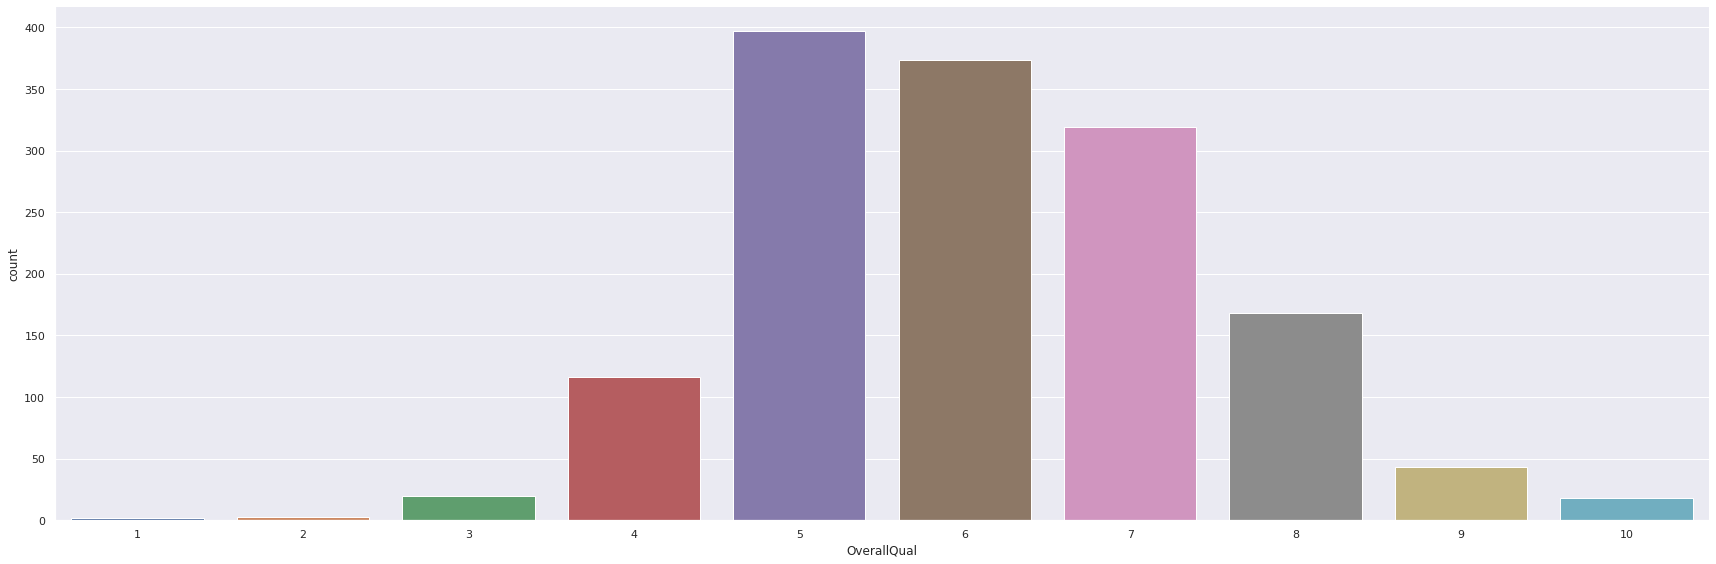

In [12]:
for var in houseCatData:
  sb.catplot(x = var, data = houseCatData, kind = 'count', height = 8, aspect = 3)

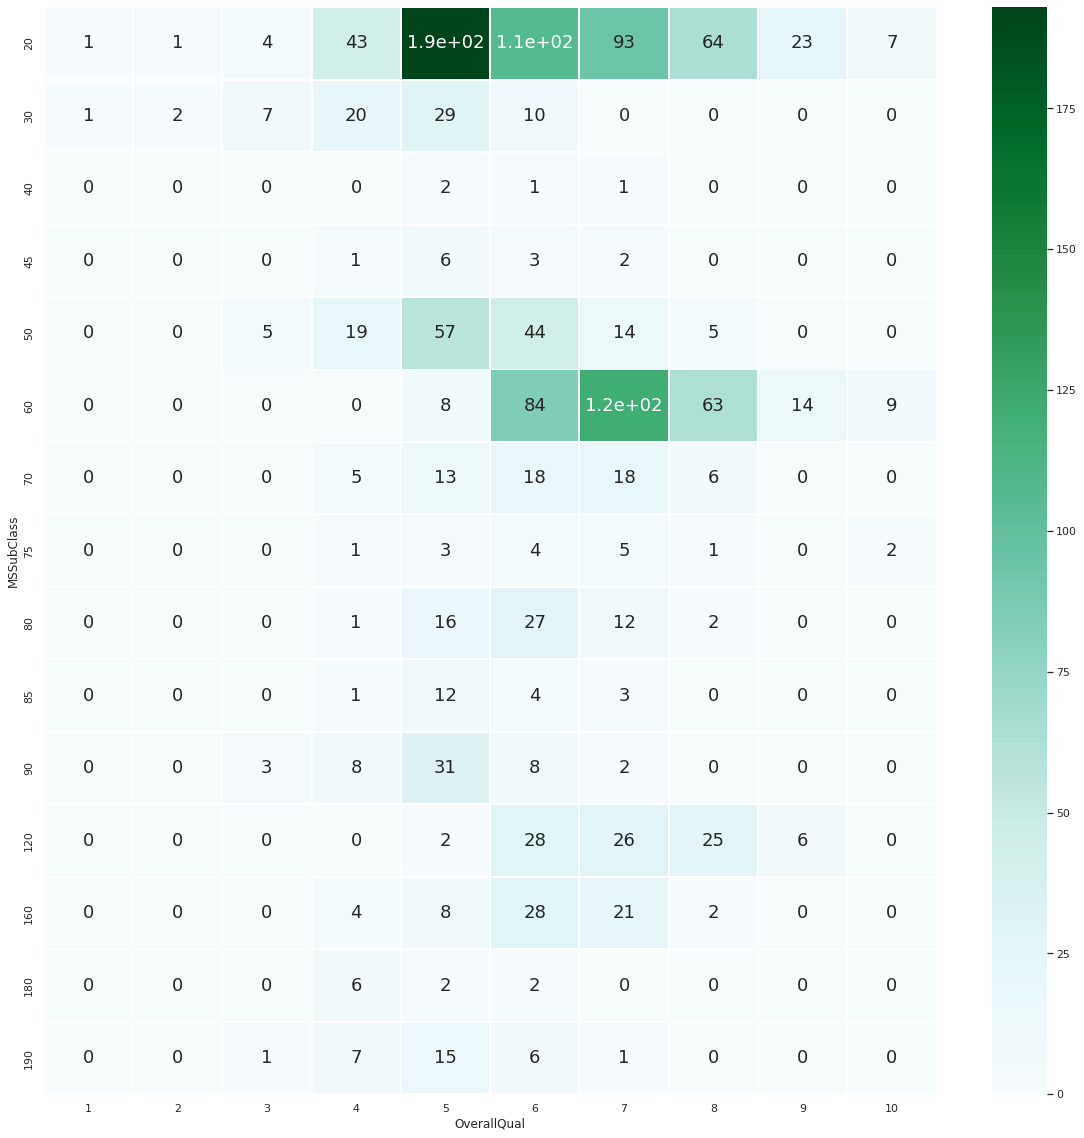

In [13]:
# Distribution of the Two Types
f = plt.figure(figsize=(20, 20))
sb.heatmap(houseCatData.groupby(['MSSubClass', 'OverallQual']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")

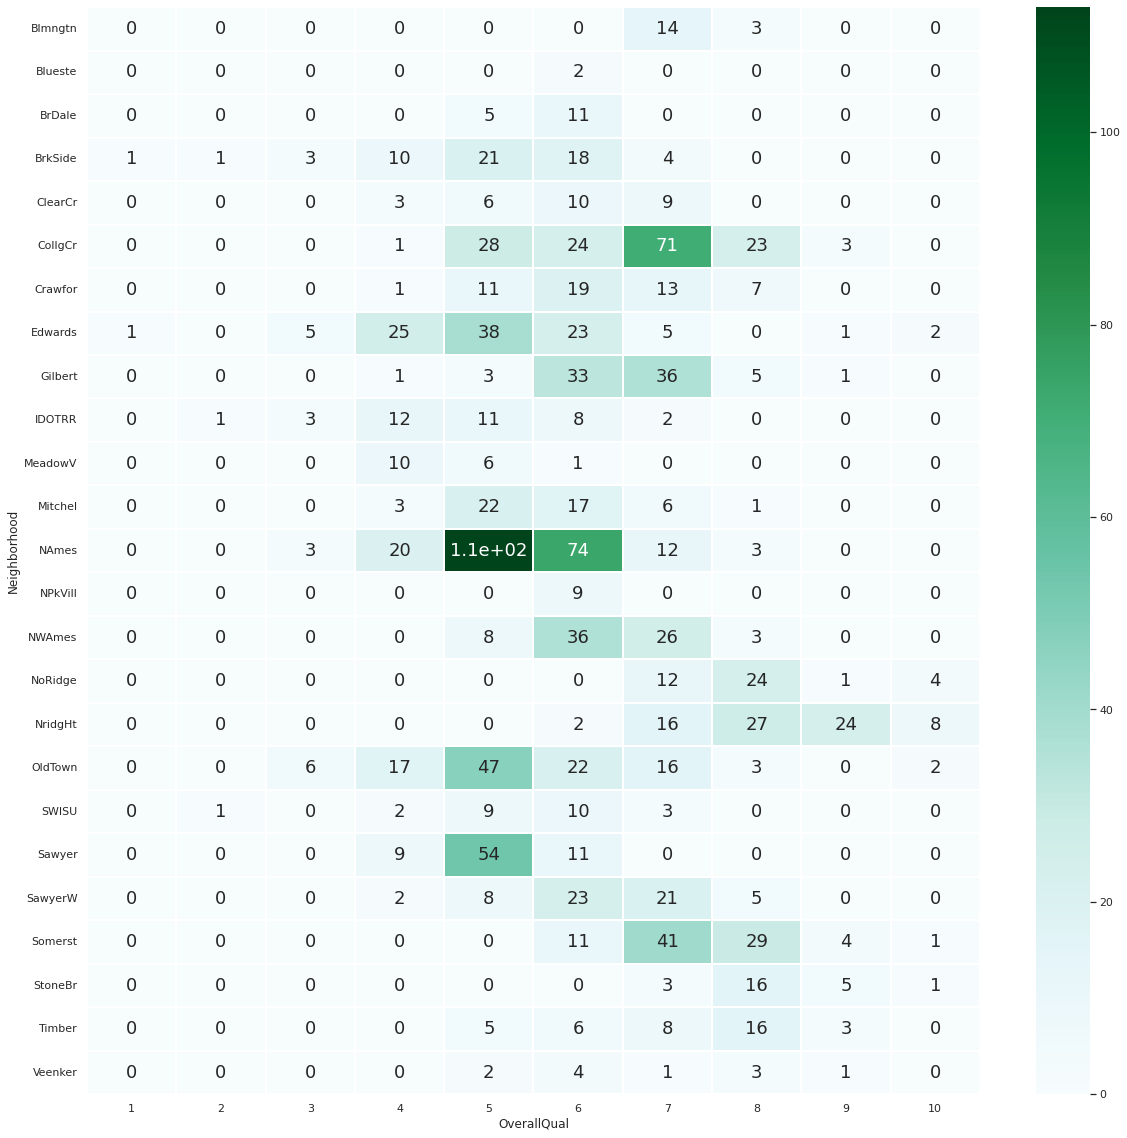

In [14]:
# Distribution of the Two Types
f = plt.figure(figsize=(20, 20))
sb.heatmap(houseCatData.groupby(['Neighborhood', 'OverallQual']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")

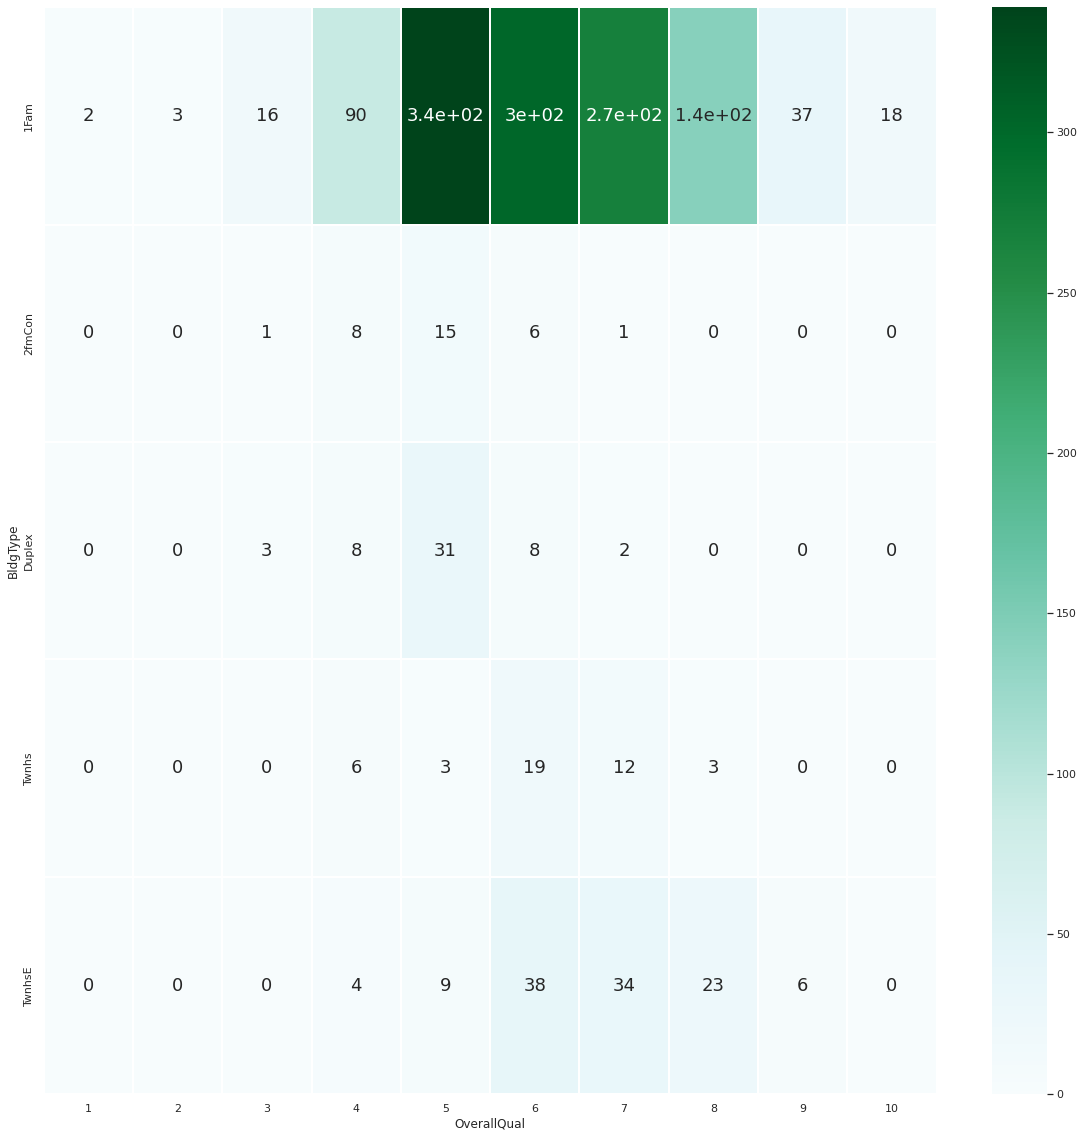

In [15]:
# Distribution of the Two Types
f = plt.figure(figsize=(20, 20))
sb.heatmap(houseCatData.groupby(['BldgType', 'OverallQual']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")

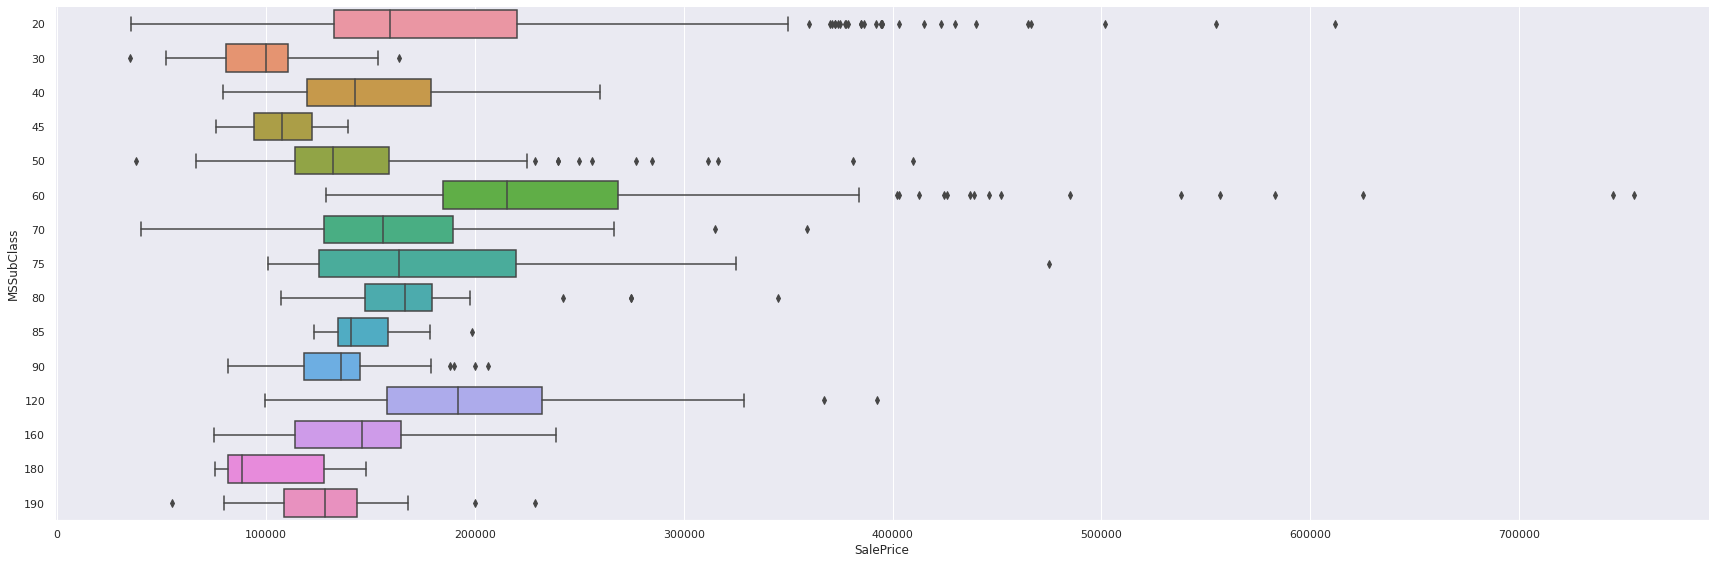

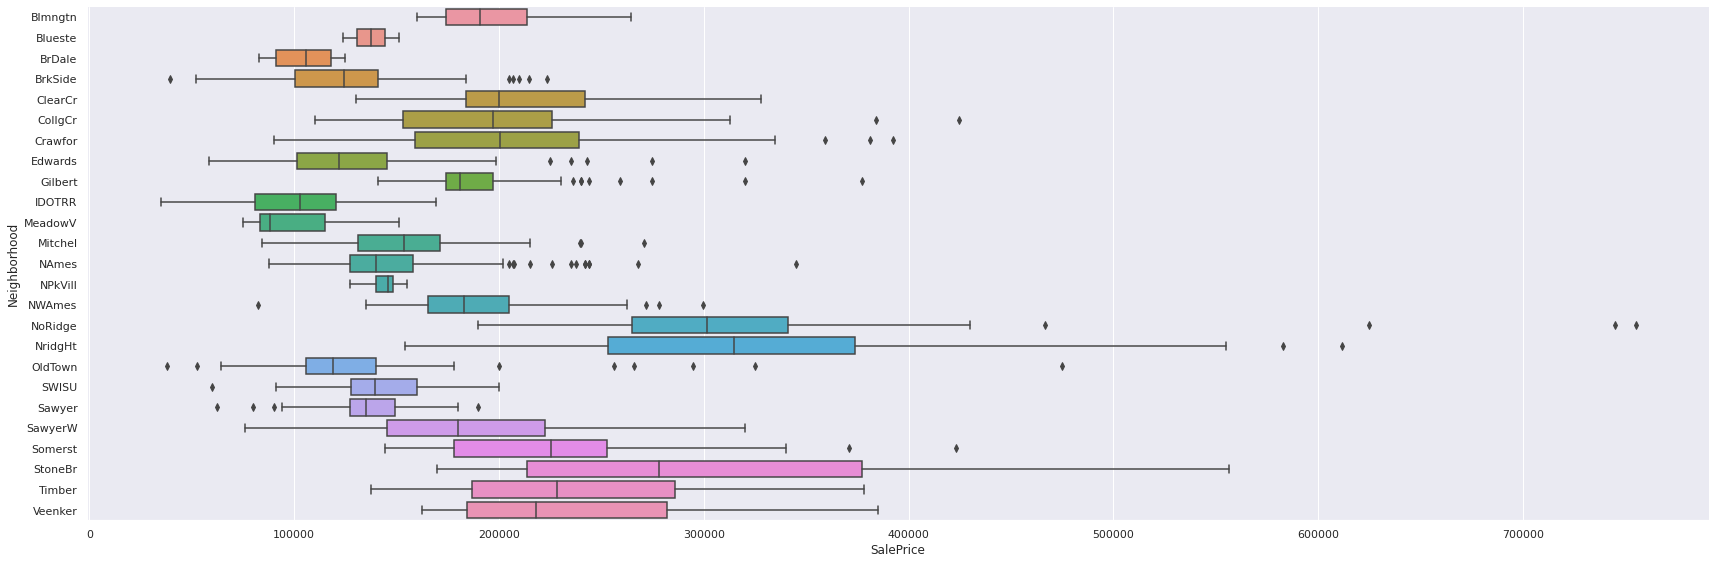

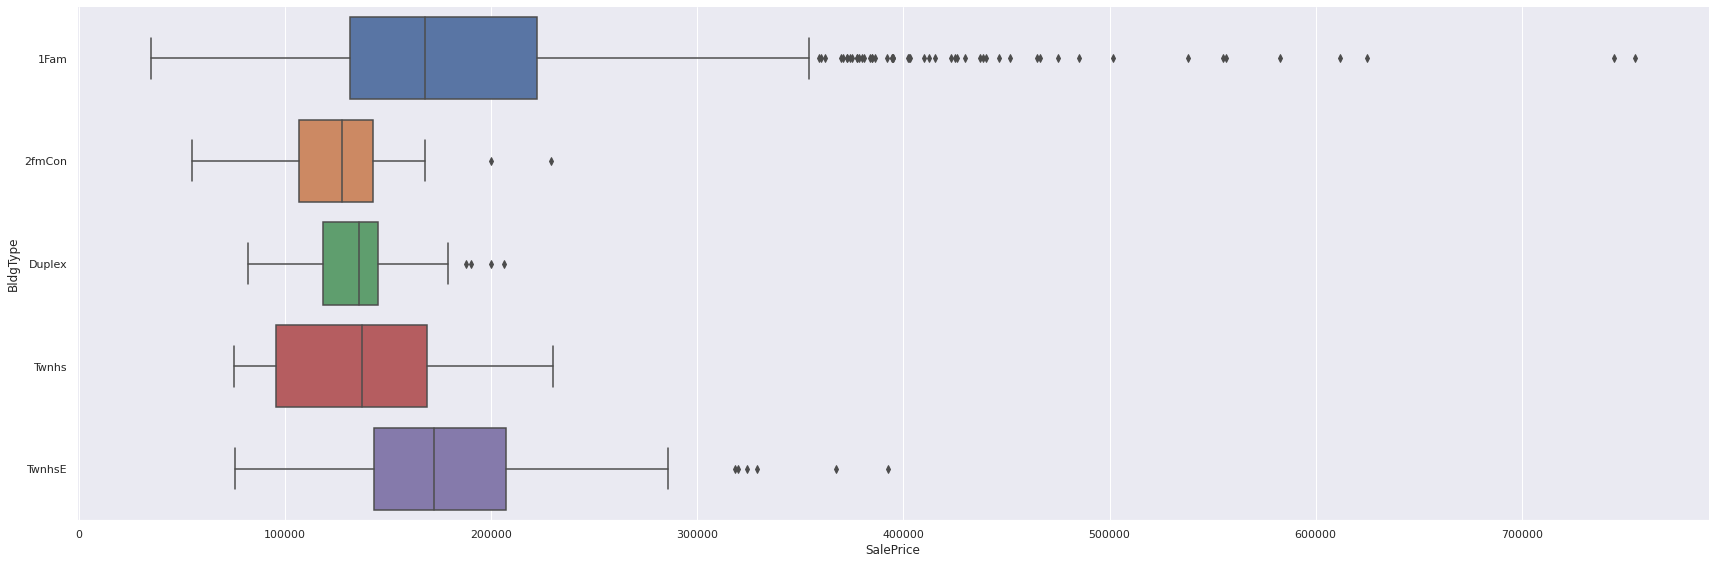

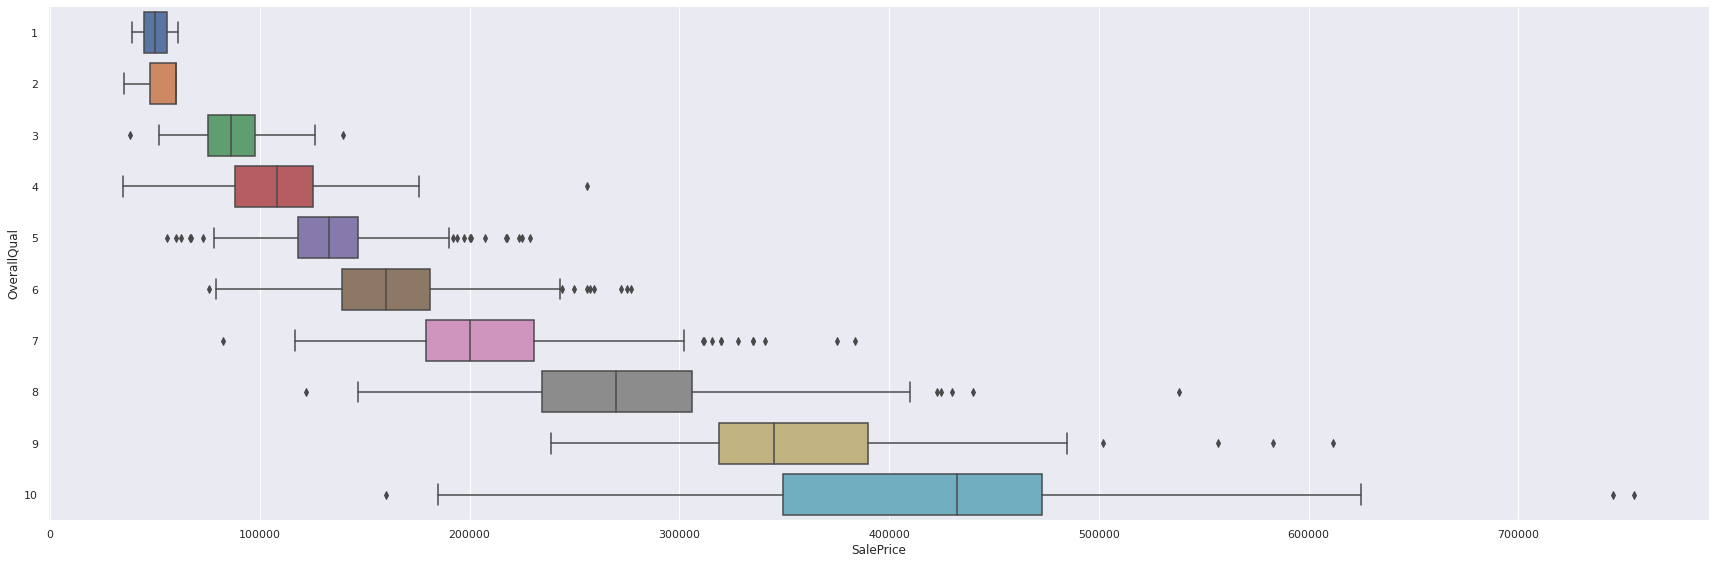

In [21]:
salePrice = pd.Series(houseData['SalePrice'])
jointdf = pd.concat([salePrice, houseCatData], axis = 1).reindex(salePrice.index)
for var in houseCatData:
  sb.catplot(x = 'SalePrice' ,y = var, data = jointdf , kind = 'box', height = 8, aspect = 3)